# Regressão Linear e Polinomial com Python

In [10]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
# CONFIGS
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
plt.style.use('fivethirtyeight')
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
USAhousing = pd.read_csv('../../data/USA_Housing.csv')

In [13]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,"79,545.46",5.68,7.01,4.09,"23,086.80","1,059,033.56","208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"79,248.64",6.00,6.73,3.09,"40,173.07","1,505,890.91","188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"61,287.07",5.87,8.51,5.13,"36,882.16","1,058,987.99","9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,"63,345.24",7.19,5.59,3.26,"34,310.24","1,260,616.81",USS Barnett\nFPO AP 44820
4,"59,982.20",5.04,7.84,4.23,"26,354.11","630,943.49",USNS Raymond\nFPO AE 09386


In [14]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [15]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"68,583.11",5.98,6.99,3.98,"36,163.52","1,232,072.65"
std,"10,657.99",0.99,1.01,1.23,"9,925.65","353,117.63"
min,"17,796.63",2.64,3.24,2.00,172.61,"15,938.66"
25%,"61,480.56",5.32,6.30,3.14,"29,403.93","997,577.14"
50%,"68,804.29",5.97,7.00,4.05,"36,199.41","1,232,669.38"
75%,"75,783.34",6.65,7.67,4.49,"42,861.29","1,471,210.20"
max,"107,701.75",9.52,10.76,6.50,"69,621.71","2,469,065.59"


### Analisando o comportamento dos preços

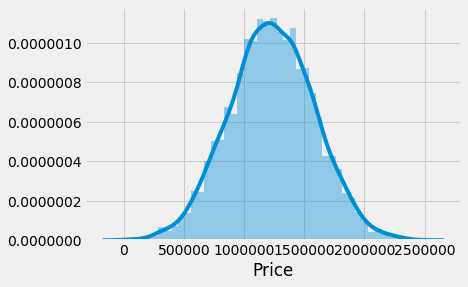

In [16]:
sns.distplot(USAhousing['Price'])

### Utilize a correlação para identificar o comportamento das variáveis independentes com a dependente (Price)

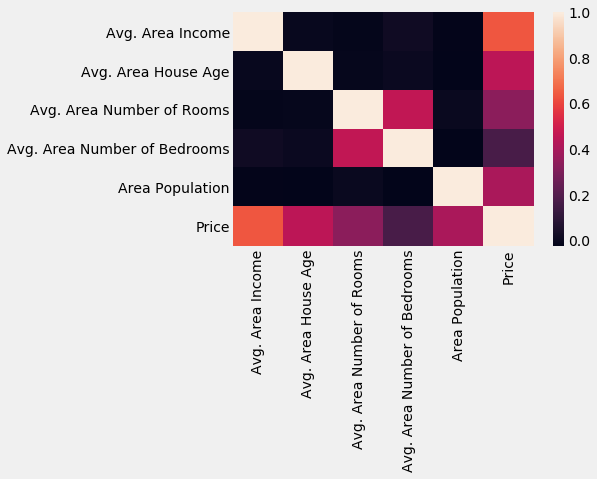

In [17]:
sns.heatmap(USAhousing.corr())

## Se você fosse trabalhar com um modelo linear univariado, qual seria a variável independente que você escolheria como parte do modelo?

### Resposta

In [18]:
#Media area 

## Criando um modelo de regressão linear

### Regressão univariada
Crie um modelo de regressão univariada com base na variávei independente escolhida anteriormente.

In [19]:
X = USAhousing['Avg. Area Income'] #Obtenha a coluna de dados referente à variável independente
y = USAhousing['Price']

#### Treino/Teste Split

Vamos criar os nossos dados de treino e teste para o modelo.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Treinando o modelo

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()
reshape_ = lambda x : np.array(x).reshape(-1, 1)

In [24]:
lm.fit(reshape_(X_train),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
predictions = lm.predict(reshape_(X_test))

In [26]:
lm.predict(reshape_(79545))

array([1463329.2258734])

### Regressão multivariada

In [27]:
lm1 = LinearRegression()
X1 = USAhousing.drop(columns=['Price', 'Address'], axis=1) #Obtenha os dados das variáveis independentes que seja usar
y1 = USAhousing['Price']

#### Treino/Teste Split

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=101)

#### Treinando o modelo

In [29]:
lm1.fit(reshape_(X_train1),y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
predictions2 = lm1.predict(reshape_(X_test1))
predictions2

array([1192921.7949516 , 1095717.9479065 , 1338354.39105406, ...,
       1046529.91661214, 1028923.59004055, 1144892.07766601])

## Avaliação do modelo

#### Verificando os coeficientes do modelo

In [ ]:
print(lm1.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

### Interprete os resultados. O que significa ter os valores acima para os coeficientes do modelo?

### Analisando a qualidade dos resultados

#### Realize as predições para o modelo univariado

In [ ]:
predictions = lm.predict(X_test)

#### Desafio:
Como temos apenas uma dimensão, é possível plotarmos a relação entre as variáveis. Portanto, plote abaixo a reta gerada pelo modelo criado e os pontos originais.

#### Agora as predições para o modelo multivariado

#### Aplique as métricas de avaliação do modelo e compare os resultados

In [ ]:
from sklearn import metrics

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
# R2 ?

## Regressão polinomial

#### Aplique PolynomialFeatures do sklearn para obter uma regressão polinomial dos modelos anteriores.
#### Aplique tanto para o modelo univariado quanto para o multivariado.

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html